Este proyecto se enfoca en el análisis de un dataset relacionado con ciberataques, con el objetivo de identificar patrones y tendencias que permitan mejorar las estrategias de ciberseguridad. El dataset incluye información detallada sobre eventos de seguridad ocurridos en una red informática, lo que nos permite explorar la frecuencia y severidad de los ataques en función de diferentes variables, como la hora del día y el tipo de ataque.

A través de visualizaciones, se pretende responder preguntas clave, como los protocolos más utilizados en los ciberataques, la correlación entre el número de eventos bloqueados/ingresados/ignorados y los valores de Anomaly Scores, la distribución temporal de los ataques a lo largo del día, y la variación de la frecuencia de ataques a lo largo del año para cada tipo de ataque.

El análisis tiene como finalidad proporcionar insights valiosos que ayuden a identificar los períodos de mayor riesgo, los tipos de ataques más críticos y la efectividad de las actuales medidas de seguridad. De esta manera, se busca contribuir a la mejora continua de las defensas cibernéticas.

***Pregunta 1:*** Cuáles son los protocolos más utilizados en los ciberataques?

 *Hipótesis:* Se espera que ciertos protocolos, como HTTP y TCP, sean más frecuentemente utilizados en los ciberataques debido a su prevalencia en la comunicación de redes.


***Pregunta 2:*** El número de eventos bloqueados/ingresados/ignorados aumenta o disminuye con valores más altos de Anomaly Scores?

  *Hipótesis:* Es probable que los eventos con valores más altos de Anomaly Scores estén asociados con una mayor cantidad de eventos bloqueados, ya que puntajes más altos podrían indicar actividades más sospechosas.


***Pregunta 3:*** La mayor cantidad de ataque se producen por la madrugada? Esto podria deberse a que en esos horarios la seguridad baja ya que no suelen haber persoans controlando los sistemas y trabajando sobre los mismos

  *Hipótesis:* Se espera encontrar una mayor concentración de ataques durante la madrugada, lo cual podría estar relacionado con la reducción de la supervisión durante esas horas.


***Pregunta 4:*** Cómo varía la frecuencia de ataques a lo largo del año para cada tipo de ataque?

 *Hipótesis:* Es posible que algunos tipos de ataques sigan patrones estacionales, con picos en ciertas épocas del año.


[Dataset utilizado](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import numpy as np

Se carga el Dataset que posee los siguientes campos:



In [8]:
uploaded = files.upload()
df = pd.read_csv('cybersecurity_attacks.csv', sep=',', encoding='latin1')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


Se identifica que algunas columnas no estan bien categorizadas por lo que se redefinen los tipos de datos o se detecta una gran cantidad de datos null

In [26]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Malware Indicators'].fillna(0, inplace=True)
df['Alerts/Warnings'].fillna('0', inplace=True)
df['IDS/IPS Alerts'].fillna('Null', inplace=True)
df['Firewall Logs'].fillna('0', inplace=True)
df['Proxy Information'].fillna('0', inplace=True)

# Convierto 'IoC Detected' en 1 y los otros en 0
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else 0)
# Verifico
print(df['Malware Indicators'].value_counts())

Malware Indicators
1    20000
0    20000
Name: count, dtype: int64


***Pregunta 1:*** Cuáles son los protocolos más utilizados en los ciberataques? Se podría identificar si algún protocolo es más utilizado para realizar ataques debido a que es más vulnerable o más fácil de atacar.

Para responder a esta pregunta, se ha realizado un análisis de la frecuencia de cada protocolo en los ciberataques registrados:

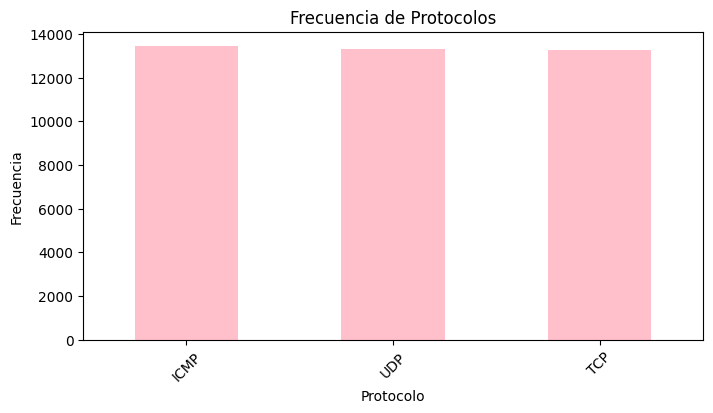

In [32]:
protocol_counts = df['Protocol'].value_counts()

#Se analiza la frecuencia de uso de cada protocolo
plt.figure(figsize=(8, 4))
protocol_counts.plot(kind='bar', color='pink')
plt.title('Frecuencia de Protocolos')
plt.xlabel('Protocolo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

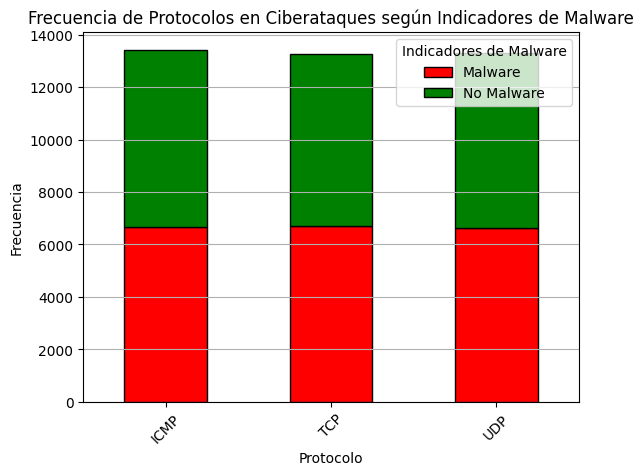

In [31]:
#Se analiza cuantas, de las veces que se utilizo el protocolo, se lo asocio a un indicador de compromiso de un malware para detectar posibles ataques de seguridad

# Filtro los datos según si hay indicadores de malware
malware_df = df[df['Malware Indicators'] == 1]
non_malware_df = df[df['Malware Indicators'] == 0]

# Contar la frecuencia de protocolos en cada grupo
malware_protocol_counts = malware_df['Protocol'].value_counts()
non_malware_protocol_counts = non_malware_df['Protocol'].value_counts()

# Creo un DataFrame combinado para facilitar la creación del gráfico
combined_protocol_counts = pd.DataFrame({
    'Malware': malware_protocol_counts,
    'No Malware': non_malware_protocol_counts
}).fillna(0)  # Rellenar con 0 donde faltan datos

# Creo el gráfico
plt.figure(figsize=(12, 6))

# Se cosnidera rojo su tiene indicador de malware y verde si no
combined_protocol_counts.plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black')

plt.title('Frecuencia de Protocolos en Ciberataques según Indicadores de Malware')
plt.xlabel('Protocolo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Indicadores de Malware')
plt.grid(axis='y')

plt.show()

Al observar los resultados, se puede identificar que:

***Diversidad de Protocolos:*** No hay un protocolo específico que se utilice significativamente más que otros. Esto sugiere que los ciberataques están distribuidos a lo largo de una variedad de protocolos, lo que podría implicar que no hay un protocolo claramente más vulnerable o más fácil de atacar que los demás.

***Distribución Uniforme:*** La falta de una tendencia clara en la distribución de los ataques entre los protocolos indica que los atacantes pueden estar explotando una variedad de vectores. Esto puede reflejar un enfoque generalizado en lugar de una explotación específica de vulnerabilidades en un protocolo particular.

***Implicaciones de Seguridad:*** Aunque no hay un protocolo predominante, es importante mantener una vigilancia constante sobre todos los protocolos

Pregunta 2: El número de eventos bloqueados/ingresados/ignorados aumenta o disminuye con valores más altos de Anomaly Scores?

Primero se analizaron los casos que fueron bloqueados:

<ipython-input-79-4d64b07f5cd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_df['Rounded Anomaly Scores'] = blocked_df['Anomaly Scores'].round().astype(int)


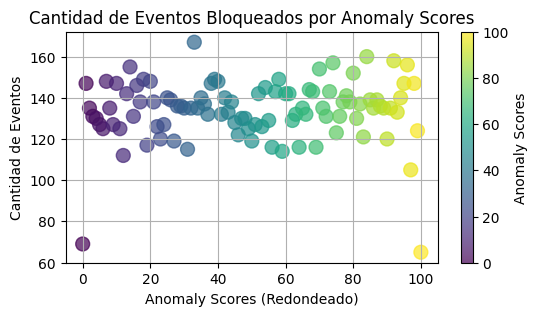

In [79]:
# Filtro eventos donde la acción tomada es 'Blocked'
blocked_df = df[df['Action Taken'] == 'Blocked']

# Redondeo Anomaly Scores al entero más cercano
blocked_df['Rounded Anomaly Scores'] = blocked_df['Anomaly Scores'].round().astype(int)

# Cuento eventos por cada valor de Anomaly Scores redondeado
count_by_anomaly = blocked_df.groupby('Rounded Anomaly Scores').size().reset_index(name='Event Count')

# Creo el gráfico de dispersión con color según el puntaje de Anomaly Scores
plt.figure(figsize=(6, 3))
scatter = plt.scatter(count_by_anomaly['Rounded Anomaly Scores'], count_by_anomaly['Event Count'],
                      c=count_by_anomaly['Rounded Anomaly Scores'], cmap='viridis', alpha=0.7, s=100)

plt.colorbar(scatter, label='Anomaly Scores')

plt.title('Cantidad de Eventos Bloqueados por Anomaly Scores')
plt.xlabel('Anomaly Scores (Redondeado)')
plt.ylabel('Cantidad de Eventos')
plt.grid(True)

plt.show()

Los eventos parecen estar más concentrados en puntuaciones de anomalía más bajas (por debajo de 60). Esto podría indicar que la mayoría de los eventos bloqueados tienen puntuaciones de anomalía moderadas.

No hay una tendenciade aumento o disminución de la cantidad de eventos bloqueados con respecto al aumento en las puntuaciones de anomalía. Esto sugiere que los eventos bloqueados no están directamente correlacionados con las puntuaciones de anomalía de forma lineal.

Por otro lado, se detecta unA variación amplia. Esto podría sugerir que, independientemente de la cantidad de eventos bloqueados, las puntuaciones de anomalía pueden variar significativamente.

<ipython-input-82-bcfef7f1290a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_df['Rounded Anomaly Scores'] = blocked_df['Anomaly Scores'].round().astype(int)


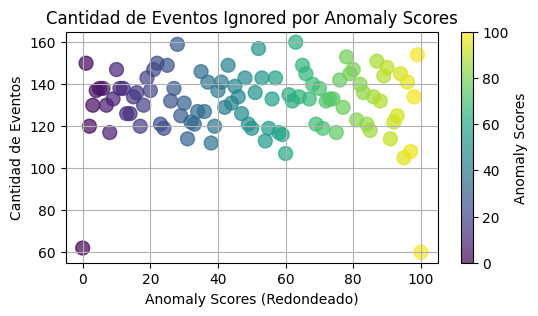

In [82]:
# Filtrar eventos donde la acción tomada es 'Ignored'
blocked_df = df[df['Action Taken'] == 'Ignored']

# Redondeo
blocked_df['Rounded Anomaly Scores'] = blocked_df['Anomaly Scores'].round().astype(int)

# Cuento
count_by_anomaly = blocked_df.groupby('Rounded Anomaly Scores').size().reset_index(name='Event Count')

# Creo el gráfico de dispersión
plt.figure(figsize=(6, 3))
scatter = plt.scatter(count_by_anomaly['Rounded Anomaly Scores'], count_by_anomaly['Event Count'],
                      c=count_by_anomaly['Rounded Anomaly Scores'], cmap='viridis', alpha=0.7, s=100)

plt.colorbar(scatter, label='Anomaly Scores')

plt.title('Cantidad de Eventos Ignored por Anomaly Scores')
plt.xlabel('Anomaly Scores (Redondeado)')
plt.ylabel('Cantidad de Eventos')
plt.grid(True)

plt.show()

La distribución de los puntos es similar al gráfico anterior. Los eventos ignorados se encuentran en una amplia gama de puntuaciones de anomalía, con una mayor concentración de eventos en puntuaciones entre 0 y 50.

A simple vista, no parece haber un patrón claro de aumento o disminución en la cantidad de eventos ignorados a medida que aumenta la puntuación de anomalía. Sin embargo, se observa que para puntuaciones de anomalía altas (cerca de 100), la cantidad de eventos disminuye un poco, aunque sigue habiendo una cantidad significativa.

Cabe aclarar que ignorar eventos con una puntuacion de anomalia cercana a 100 puede significar un gran riesgo al ecosistema y una grave falta del equipo de seguridad informatica.

<ipython-input-83-546a8b4f33c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_df['Rounded Anomaly Scores'] = blocked_df['Anomaly Scores'].round().astype(int)


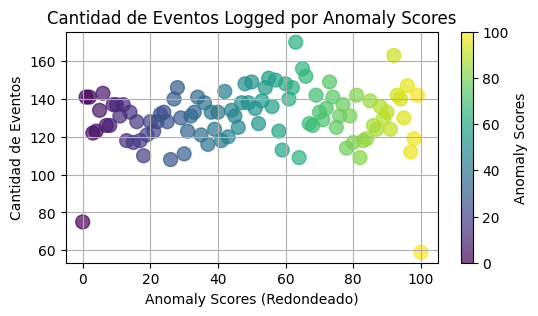

In [83]:
# Filtro
blocked_df = df[df['Action Taken'] == 'Logged']

# Redondeo
blocked_df['Rounded Anomaly Scores'] = blocked_df['Anomaly Scores'].round().astype(int)

# Cuento
count_by_anomaly = blocked_df.groupby('Rounded Anomaly Scores').size().reset_index(name='Event Count')

# Creo el gráfico
plt.figure(figsize=(6, 3))
scatter = plt.scatter(count_by_anomaly['Rounded Anomaly Scores'], count_by_anomaly['Event Count'],
                      c=count_by_anomaly['Rounded Anomaly Scores'], cmap='viridis', alpha=0.7, s=100)

plt.colorbar(scatter, label='Anomaly Scores')

plt.title('Cantidad de Eventos Logged por Anomaly Scores')
plt.xlabel('Anomaly Scores (Redondeado)')
plt.ylabel('Cantidad de Eventos')
plt.grid(True)

plt.show()

El patron de los gráficos anteriores se refleja en este tambien, la mayor concentración de eventos registrados se encuentra en las puntuaciones de anomalía más bajas (entre 0 y 50). Sin embargo, hay eventos registrados en toda la gama de puntuaciones de anomalía.

Tambien no parece haber una correlación lineal clara entre la cantidad de eventos registrados y las puntuaciones de anomalía.

***Pregunta 3:*** La mayor cantidad de ataque se producen por la madrugada? Esto podria deberse a que en esos horarios la seguridad baja ya que no suelen haber persoans controlando los sistemas y trabajando sobre los mismos

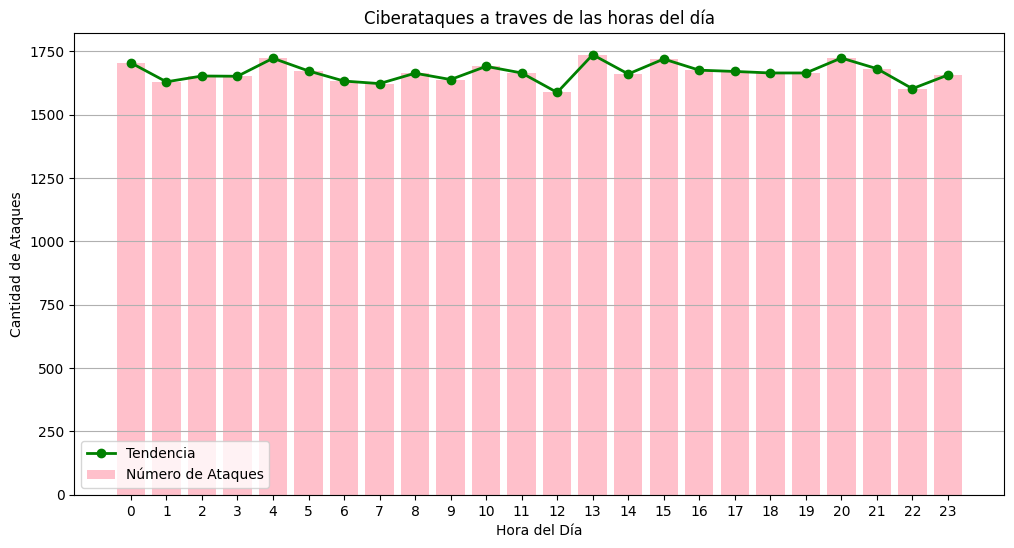

In [ ]:

df['Hour'] = df['Timestamp'].dt.hour
attacks_by_hour = df['Hour'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(attacks_by_hour.index, attacks_by_hour.values, color='pink', label='Número de Ataques')

# Línea de tendencia
plt.plot(attacks_by_hour.index, attacks_by_hour.values, color='green', marker='o', linestyle='-', linewidth=2, markersize=6, label='Tendencia')

plt.title('Ciberataques a traves de las horas del día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Ataques')
plt.xticks(range(24))
plt.grid(axis='y')

plt.legend()
plt.show()

Dado el resultado del análisis horario, se puede observar que no se detecta una mayor cantidad de ataques en un horario específico. A pesar de que el pico se produce a las 13:00 horas, la diferencia en el número de ataques entre las distintas horas no es muy grande. Esto sugiere que los sistemas están bajo constante ataque, independientemente de la hora del día.

***Pregunta 4:*** Cómo varía la frecuencia de ataques a lo largo del año para cada tipo de ataque?
Se podria observar si la frecuencia de un tipo específico de ataque aumenta o disminuye en diferentes meses del año.

<ipython-input-60-9f9f4707b632>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_count = df.groupby(['Year', 'Month', 'Attack Type']).size().reset_index(name='Count')


<Figure size 1600x1000 with 0 Axes>

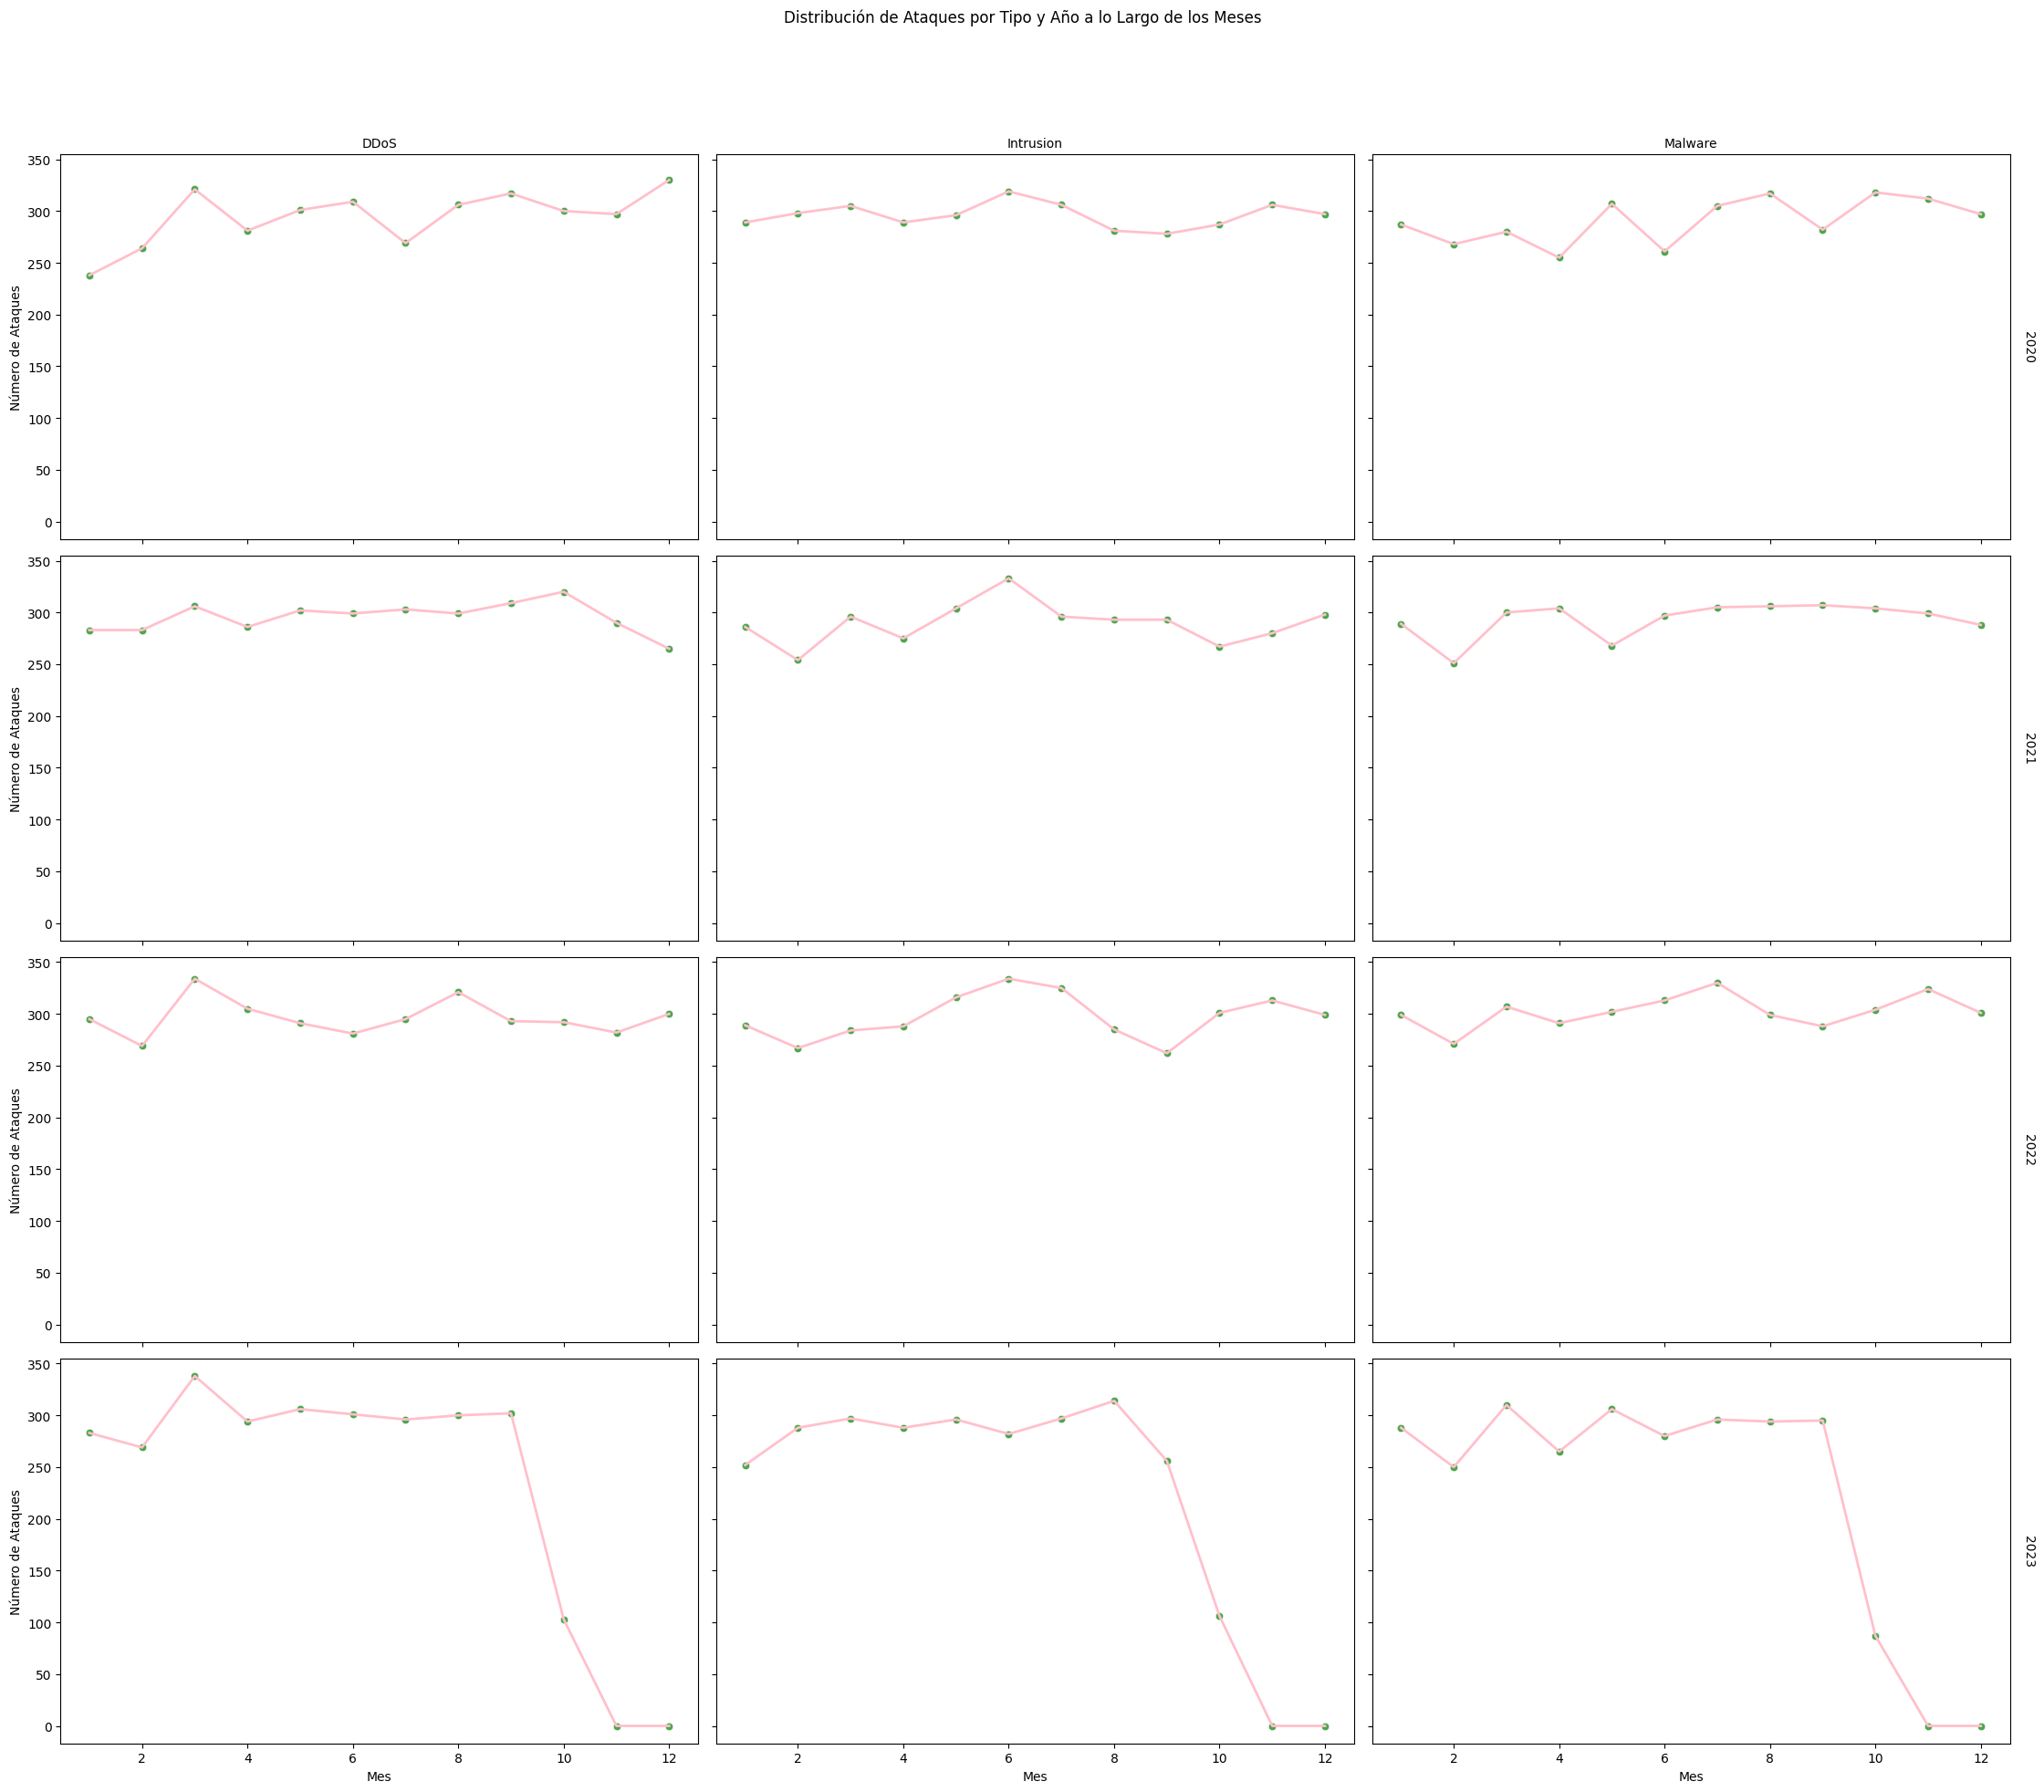

In [60]:
# Como el analisis va a ser a traves de los meses en un mimso año, extraigo las variables
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

# Cuento el número de ataques por mes y tipo de ataque
df_count = df.groupby(['Year', 'Month', 'Attack Type']).size().reset_index(name='Count')

# Creo el gráfico de dispersión para cada tipo de ataque por separado
plt.figure(figsize=(16, 10))
g = sns.FacetGrid(df_count, col='Attack Type', row='Year', margin_titles=True, despine=False, aspect=1.5, height=5)

# agreggo los puntos de dispersión y la línea de regresión
g.map_dataframe(sns.scatterplot, x='Month', y='Count', alpha=0.7, color='green')
g.map_dataframe(sns.lineplot, x='Month', y='Count', color='pink', lw=2)

# Personalizar el gráfico
g.set_axis_labels('Mes', 'Número de Ataques')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Ataques por Tipo y Año a lo Largo de los Meses')

plt.show()

In [61]:
# Visualizacion de los datos en tabla
df['Year'] = df['Timestamp'].dt.year

# Contar el número de ataques por tipo y año
attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
print("Número de Ataques por Tipo y Año:")
print(attack_counts)

Número de Ataques por Tipo y Año:
Attack Type  DDoS  Intrusion  Malware
Year                                 
2020         3533       3551     3489
2021         3545       3475     3518
2022         3558       3563     3629
2023         2792       2676     2671


<ipython-input-61-b89af3e34535>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)


Los ataques muestran una tendencia de aumento general desde 2020 hasta 2022. Sin embargo, hay una disminución notable en 2023 para todos los tipos de ataques. Esto podría indicar que, en 2023, hubo menos ataques en comparación con los años anteriores.
Por otro lado, el número de ataques de Malware ha aumentado continuamente cada año, alcanzando su punto más alto en 2022 (3629 ataques). Esto puede sugerir que el malware es una amenaza creciente y que los atacantes están adoptando técnicas más sofisticadas o dirigidas.